# Data Exploration Analysis (EDA)

This notebook provides insights to create a regression/classification model to predict the scores of movies (```imdb_score```)

In [58]:
import numpy as np
import pandas as pd
from scipy import stats
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import itertools

In [59]:
# Get working directory
os.getcwd()

'/home/victor/Documentos/data-analysis-projects/programaria/imdb/src'

In [69]:
# Read data
imdb = pd.read_csv('../data/movie_metadata.csv')

In [71]:
# Inspecting type of columns
imdb.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [72]:
# Inspecting data
imdb.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [73]:
# Adding the imdb_score categorized
imdb['categorical_imdb_score'] = pd.cut(imdb['imdb_score'], bins=[0, 4, 6, 8, 10], right=True, labels=False) + 1

In [75]:
# Removing uninformative column
imdb.drop(['movie_imdb_link', 'movie_title'], axis=1, inplace=True)

KeyError: "['movie_imdb_link' 'movie_title'] not found in axis"

In [76]:
# Summarizing missing columns
imdb.isna().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
cast_total_facebook_likes      0
num_voted_users                0
genres                         0
imdb_score                     0
categorical_imdb_score         0
dtype: int64

## Handling with multi level of categorical variables

Notice that ```genres``` and ```plot_keywords``` have multiple categories for the same movies, in order to make this information usable to inspect the relation between ```imdb_score``` variables let's transform each of them in dummy variables

### ```genres```

In [77]:
# genres in list of lists
genres_list = imdb['genres'].str.split('|').tolist()

# Unique genres
unique_genres = set(list(itertools.chain.from_iterable(genres_list)))

len(unique_genres)

26

The length of unique genres is not so big, let's make then as dummy variables and incorporate to the dataset and remove ```genres``` raw column

In [78]:
#genres_df = imdb['genres'].str.get_dummies().add_prefix('genre_')
genres_dummy = imdb['genres'].str.get_dummies()

# Removing genres column
imdb.drop(['genres'], axis=1, inplace=True)

genres_dummy.head()
#pd.concat([imdb, genres_df], axis=1)

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  \
0       1          1          0          0       0      0            0      0   
1       1          1          0          0       0      0            0      0   
2       1          1          0          0       0      0            0      0   
3       1          0          0          0       0      0            0      0   
4       0          0          0          0       0      0            1      0   

   Family  Fantasy  ...  Mystery  News  Reality-TV  Romance  Sci-Fi  Short  \
0       0        1  ...        0     0           0        0       1      0   
1       0        1  ...        0     0           0        0       0      0   
2       0        0  ...        0     0           0        0       0      0   
3       0        0  ...        0     0           0        0       0      0   
4       0        0  ...        0     0           0        0       0      0   

   Sport  Thriller  War  Western  
0      0         0    0        0  
1      0         0    0        0  
2      0         1    0        0  
3      0         1    0        0  
4      0         0    0        0  

[5 rows x 26 columns]

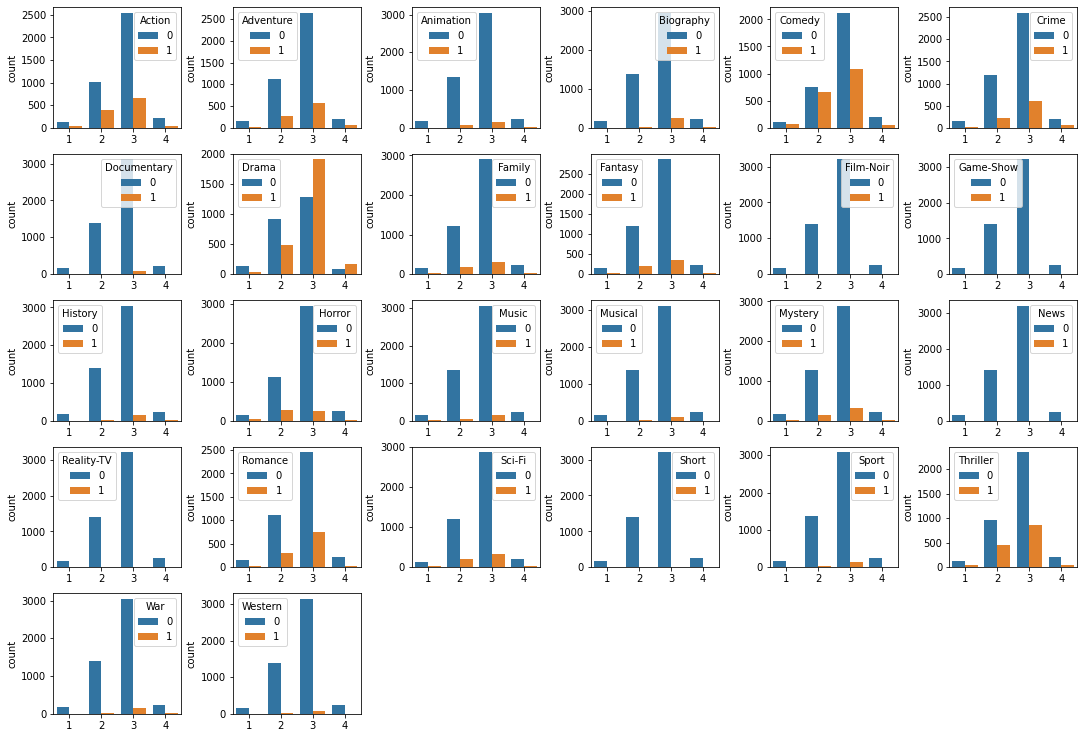

In [79]:
# Create DF with dummy variables and categorical_imdb_score
genres_df = pd.concat([imdb['categorical_imdb_score'], genres_dummy], axis=1)

# List of variables to generate the figure
all_variables = genres_df.columns.tolist()

# Auxiliary parameteres for figure
n_vars = len(all_variables) - 1
n_row = np.ceil(np.sqrt(n_vars))
i = 1

fig = plt.figure(figsize=(15, 12))

for var in all_variables:
    if var != 'categorical_imdb_score':
        ax = fig.add_subplot(n_row, n_row, i)
        sns.countplot(x='categorical_imdb_score', hue=var, data=genres_df)
        plt.xlabel("")
        i += 1
fig.tight_layout(pad=.5)
plt.show()

### ```plot_keywords```

In [80]:
# plot_keywords in list of lists
keywords_list = imdb['plot_keywords'].str.split('|').tolist()

# For each list replace space character by '-', if nan then replace by 'nan' 
# string
clean_keywords = list()
for line in keywords_list:
  if line is np.nan:
    clean_line = 'nan'
  else:
    clean_line = list()
    for word in line:
      clean_line.append(word.replace(' ', '-'))
  clean_keywords.append(clean_line)

# Unique plot_keywords
unique_keywords = set(list(itertools.chain.from_iterable(clean_keywords)))

len(unique_keywords)

8088

The length of unique keywords are too big, it's impratical to use this variable, let's drop them

In [86]:
#imdb.drop(['plot_keywords'], axis=1, inplace=True)

## Analysis of ```imdb_score``` variables

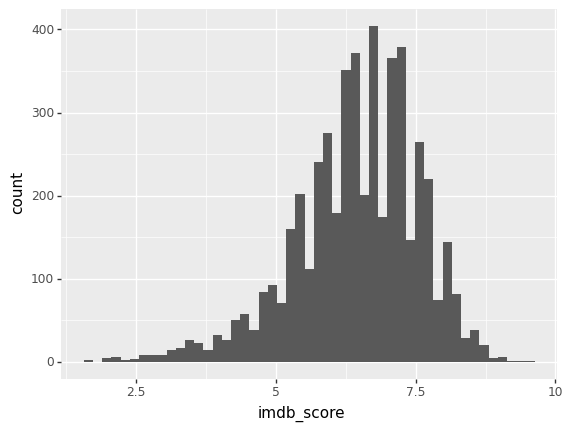

<ggplot: (-9223363303803839691)>


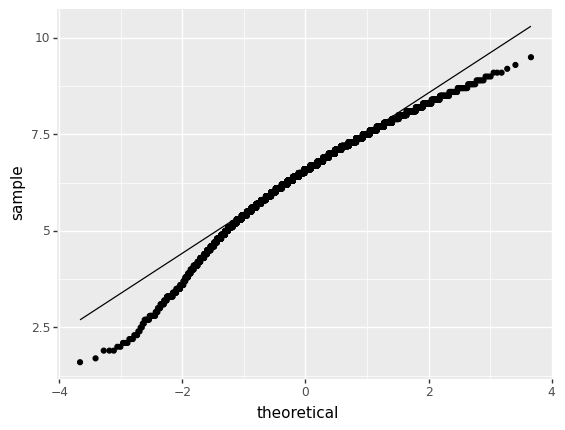

<ggplot: (8733043547831)>


In [81]:
# Distribution of imdb_score
hist = ggplot(imdb, aes(x='imdb_score')) +\
    geom_histogram()

qq_plot = ggplot(imdb, aes(sample='imdb_score')) +\
    geom_qq() +\
    geom_qq_line()

print(hist)
print(qq_plot)

As we see the above graphics, the distribution of ```imdb_score``` is not even close to normal, let's apply the Boxcox transformation to approximate to the normal distribution 

In [83]:
# Boxcox transformation of imdb_score
bc = stats.boxcox(np.array(imdb['imdb_score']))
imdb['bc_imdb_score'] = bc[0]

# Lambda value
bc[1]

2.16803355845599

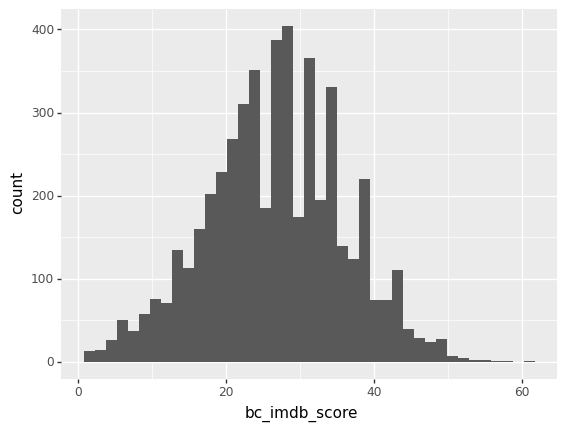

<ggplot: (8733049349843)>


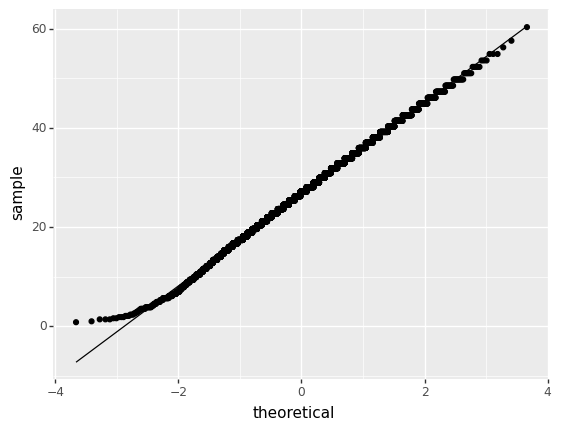

<ggplot: (8733044239585)>


In [84]:
# Distribution of bc_imdb_score
hist = ggplot(imdb, aes(x='bc_imdb_score')) +\
    geom_histogram()

qq_plot = ggplot(imdb, aes(sample='bc_imdb_score')) +\
    geom_qq() +\
    geom_qq_line()

print(hist)
print(qq_plot)


In [85]:
# Distribution of categorical_imdb_score
imdb['categorical_imdb_score'].value_counts()

3    3205
2    1411
4     253
1     174
Name: categorical_imdb_score, dtype: int64

## Relation between ```categorical_imdb_score``` and other variables

### Categorical variables

In [86]:
# Selecting only categorical variables
categorical = imdb.select_dtypes(include=['object'])

# Numer of unique values of categorical variables
for var in categorical:
    unique_values = list(set(imdb[var]))
    print(var + ':', len(unique_values))

color: 3
director_name: 2399
actor_2_name: 3033
actor_1_name: 2098
actor_3_name: 3522
plot_keywords: 4761
language: 48
country: 66
content_rating: 19


let's analize the influence of each in level of the categorical variables in categorical_imdb_score

In [87]:
def prepare_data_treemap(response_var, categorical_var, data):
    '''
    Prepare data to plot treemap using plotly.express.treemap function. Return joint distribution of two variables in percentage
    '''
    # Create joint frequency of content_rating and categorical_imdb_score 
    joint_dist = data.groupby([response_var, categorical_var]).size().reset_index(name='values')
    
    # Get the sums
    sums = joint_dist.groupby([response_var, categorical_var]).agg({'values': 'sum'})

    # Joint distribution in percentual
    percentual_df = sums.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

    # Add root to the plot
    percentual_df['root'] = response_var
    
    percentual_df.sort_values(by=[response_var])

    return percentual_df

### ```content_rating```

In [88]:
content_df = prepare_data_treemap('categorical_imdb_score', 'content_rating', imdb)

fig = px.treemap(content_df, path=['root', 'categorical_imdb_score', 'content_rating'], values='values')
fig.show()


Let's try to work with four groups in ```content_rating``` variable:
- PG-13
- R
- PG
- Other

In [89]:
# Change the values in content_rating
for i in range(0, len(imdb)): 
    if imdb['content_rating'][i] not in ['PG-13', 'R', 'PG']:
        imdb['content_rating'][i] = 'Other'

In [90]:
content_df = prepare_data_treemap('categorical_imdb_score', 'content_rating', imdb)

fig = px.treemap(content_df, path=['root', 'categorical_imdb_score', 'content_rating'], values='values')
fig.show()

### ```language```

In [91]:
language_df = prepare_data_treemap('categorical_imdb_score', 'language', imdb)

fig = px.treemap(language_df, path=['root', 'categorical_imdb_score', 'language'], values='values')
fig.show()

Notice as the ```categorized_imdb_score``` grows other languages appear more frequently. Let's create a dummy variable for english language

In [92]:
# Change the values in content_rating
for i in range(0, len(imdb)): 
    if imdb['language'][i] not in ['English']:
        imdb['language'][i] = 'Other'

In [93]:
language_df = prepare_data_treemap('categorical_imdb_score', 'language', imdb)

fig = px.treemap(language_df, path=['root', 'categorical_imdb_score', 'language'], values='values')
fig.show()

### ```director_name```

In [103]:
# Count the number of movies per director
director_values = imdb['director_name'].value_counts()

# Get the best k directors
k = 10
top_directors = list(director_values[:k].index)

# Data to dummy directors
director_dummy = imdb['director_name'].copy()

for i in range(0, len(imdb)): 
    if director_dummy[i] not in top_directors:
        director_dummy[i] = np.nan

# Dummy variables of the directors
director_dummy = director_dummy.str.get_dummies()

director_values.head(k)

Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Steven Soderbergh    16
Tim Burton           16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64

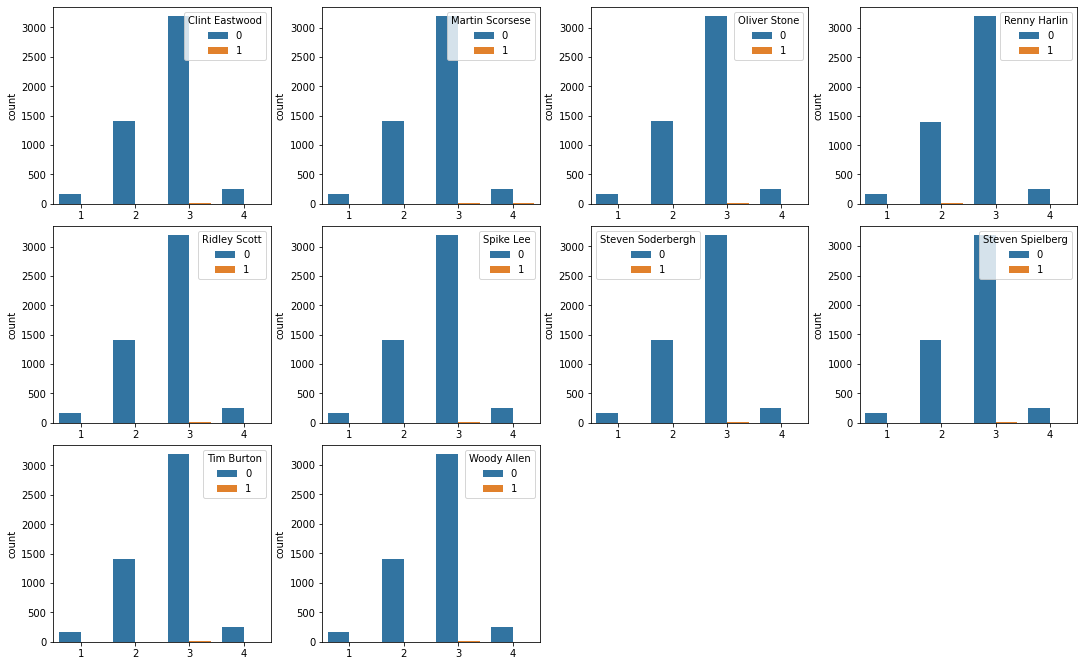

In [104]:
# Create DF with dummy variables and categorical_imdb_score
director_df = pd.concat([imdb['categorical_imdb_score'], director_dummy], axis=1)

# List of variables to generate the figure
all_variables = director_df.columns.tolist()

# Auxiliary parameteres for figure
n_vars = len(all_variables) - 1
n_row = np.ceil(np.sqrt(n_vars))
i = 1

fig = plt.figure(figsize=(15, 12))

for var in all_variables:
    if var != 'categorical_imdb_score':
        ax = fig.add_subplot(n_row, n_row, i)
        sns.countplot(x='categorical_imdb_score', hue=var, data=director_df)
        plt.xlabel("")
        i += 1
fig.tight_layout(pad=.5)
plt.show()


Notice that almost all of most frequent directors made movies with ```categorical_imdb_score``` 3 or above.

### Quantitative variables

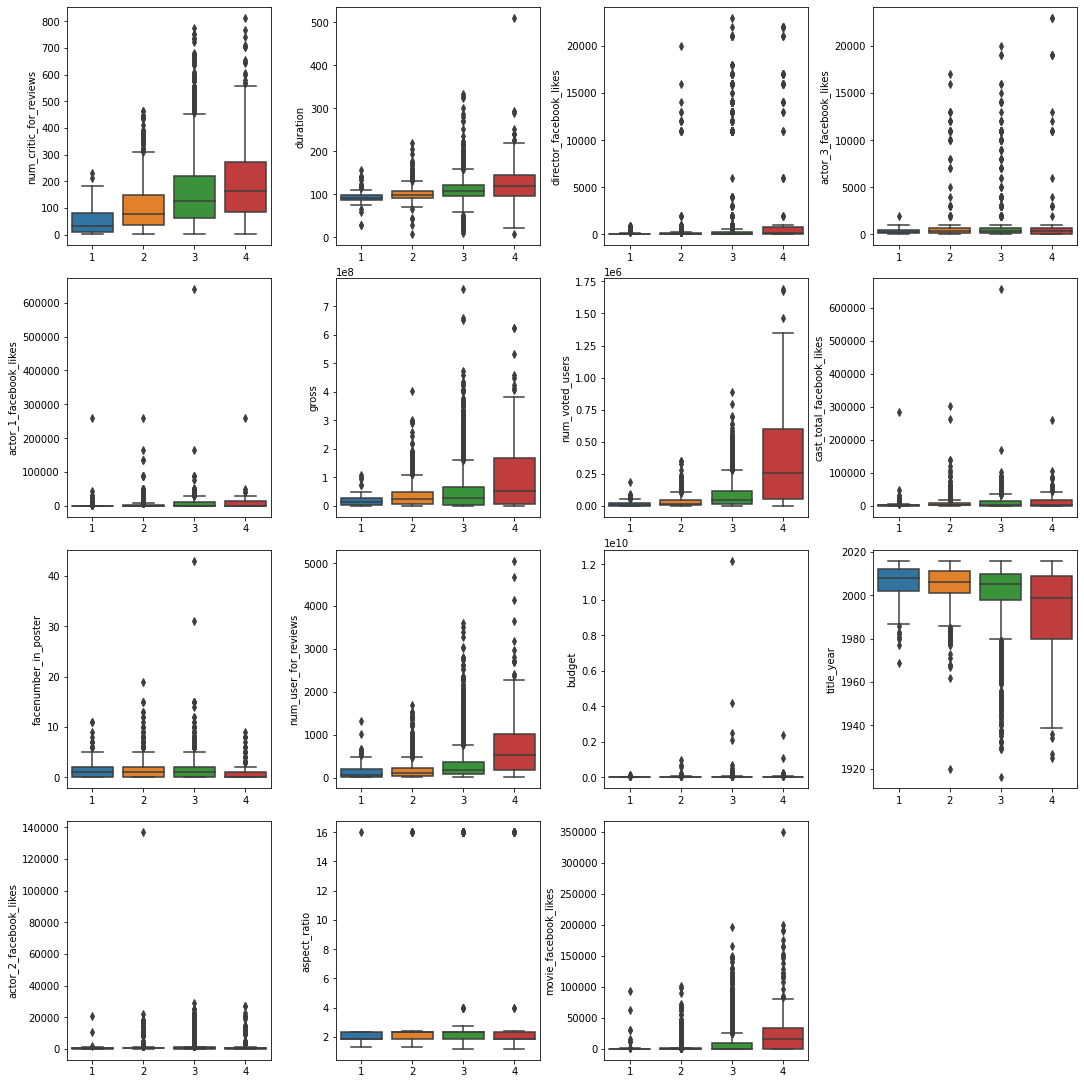

In [96]:
# Selecting only quantitative variables
quantitative = imdb.select_dtypes(include=['float64', 'int64']).drop(['imdb_score', 'bc_imdb_score'], axis=1).columns.tolist()

# Auxiliary parameteres for figure
n_vars = len(quantitative) - 1
n_row = np.ceil(np.sqrt(n_vars))
i = 1

fig = plt.figure(figsize=(15, 15))

for var in quantitative:
    if var != 'categorical_imdb_score':
        ax = fig.add_subplot(n_row, n_row, i)
        sns.boxplot(x='categorical_imdb_score', y=var, data=imdb)
        plt.xlabel("")
        i += 1
fig.tight_layout(pad=.5)
plt.show()